# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library(DBI)
library(RSQLite)
library(dplyr)
library('tidyverse')

Warning message:
“package ‘RSQLite’ was built under R version 4.4.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
con <- dbConnect(RSQLite::SQLite(), "database.sqlite")
tables <- dbListTables(con)
tibble <- tbl(con, "Pokemon")


In [3]:
con <- dbConnect(RSQLite::SQLite(), "database.sqlite")
tables <- dbListTables(con)

tibble <- tbl(con, "Pokemon")

full_tibble <- collect(tibble)


In [4]:
types = c("Normal", "Fire", "Water", "Grass", "Fighting", "Flying", "Poison", "Electric", "Ground", "Psychic", "Rock", "Ice", "Bug", "Dragon", "Dark", "Steel", "Ghost", "Fairy")

colorValues = c(
    "Normal" = "#9fa19f",
    "Fire" = "#e62829",
    "Water" = "#2980ef",
    "Grass" = "#3fa129",
    "Fighting" = "#ff8000",
    "Flying" = "#81b9ef",
    "Poison" = "#9141cb",
    "Electric" = "#fac000",
    "Ground" = "#915121",
    "Psychic" = "#ef4179",
    "Rock" = "#afa981",
    "Ice" = "#3dcef3",
    "Bug" = "#91a119",
    "Dragon" = "#5060e1",
    "Dark" = "#624d4e",
    "Steel" = "#60a1b8",
    "Ghost" = "#704170", 
    "Fairy" = "#ef70ef")

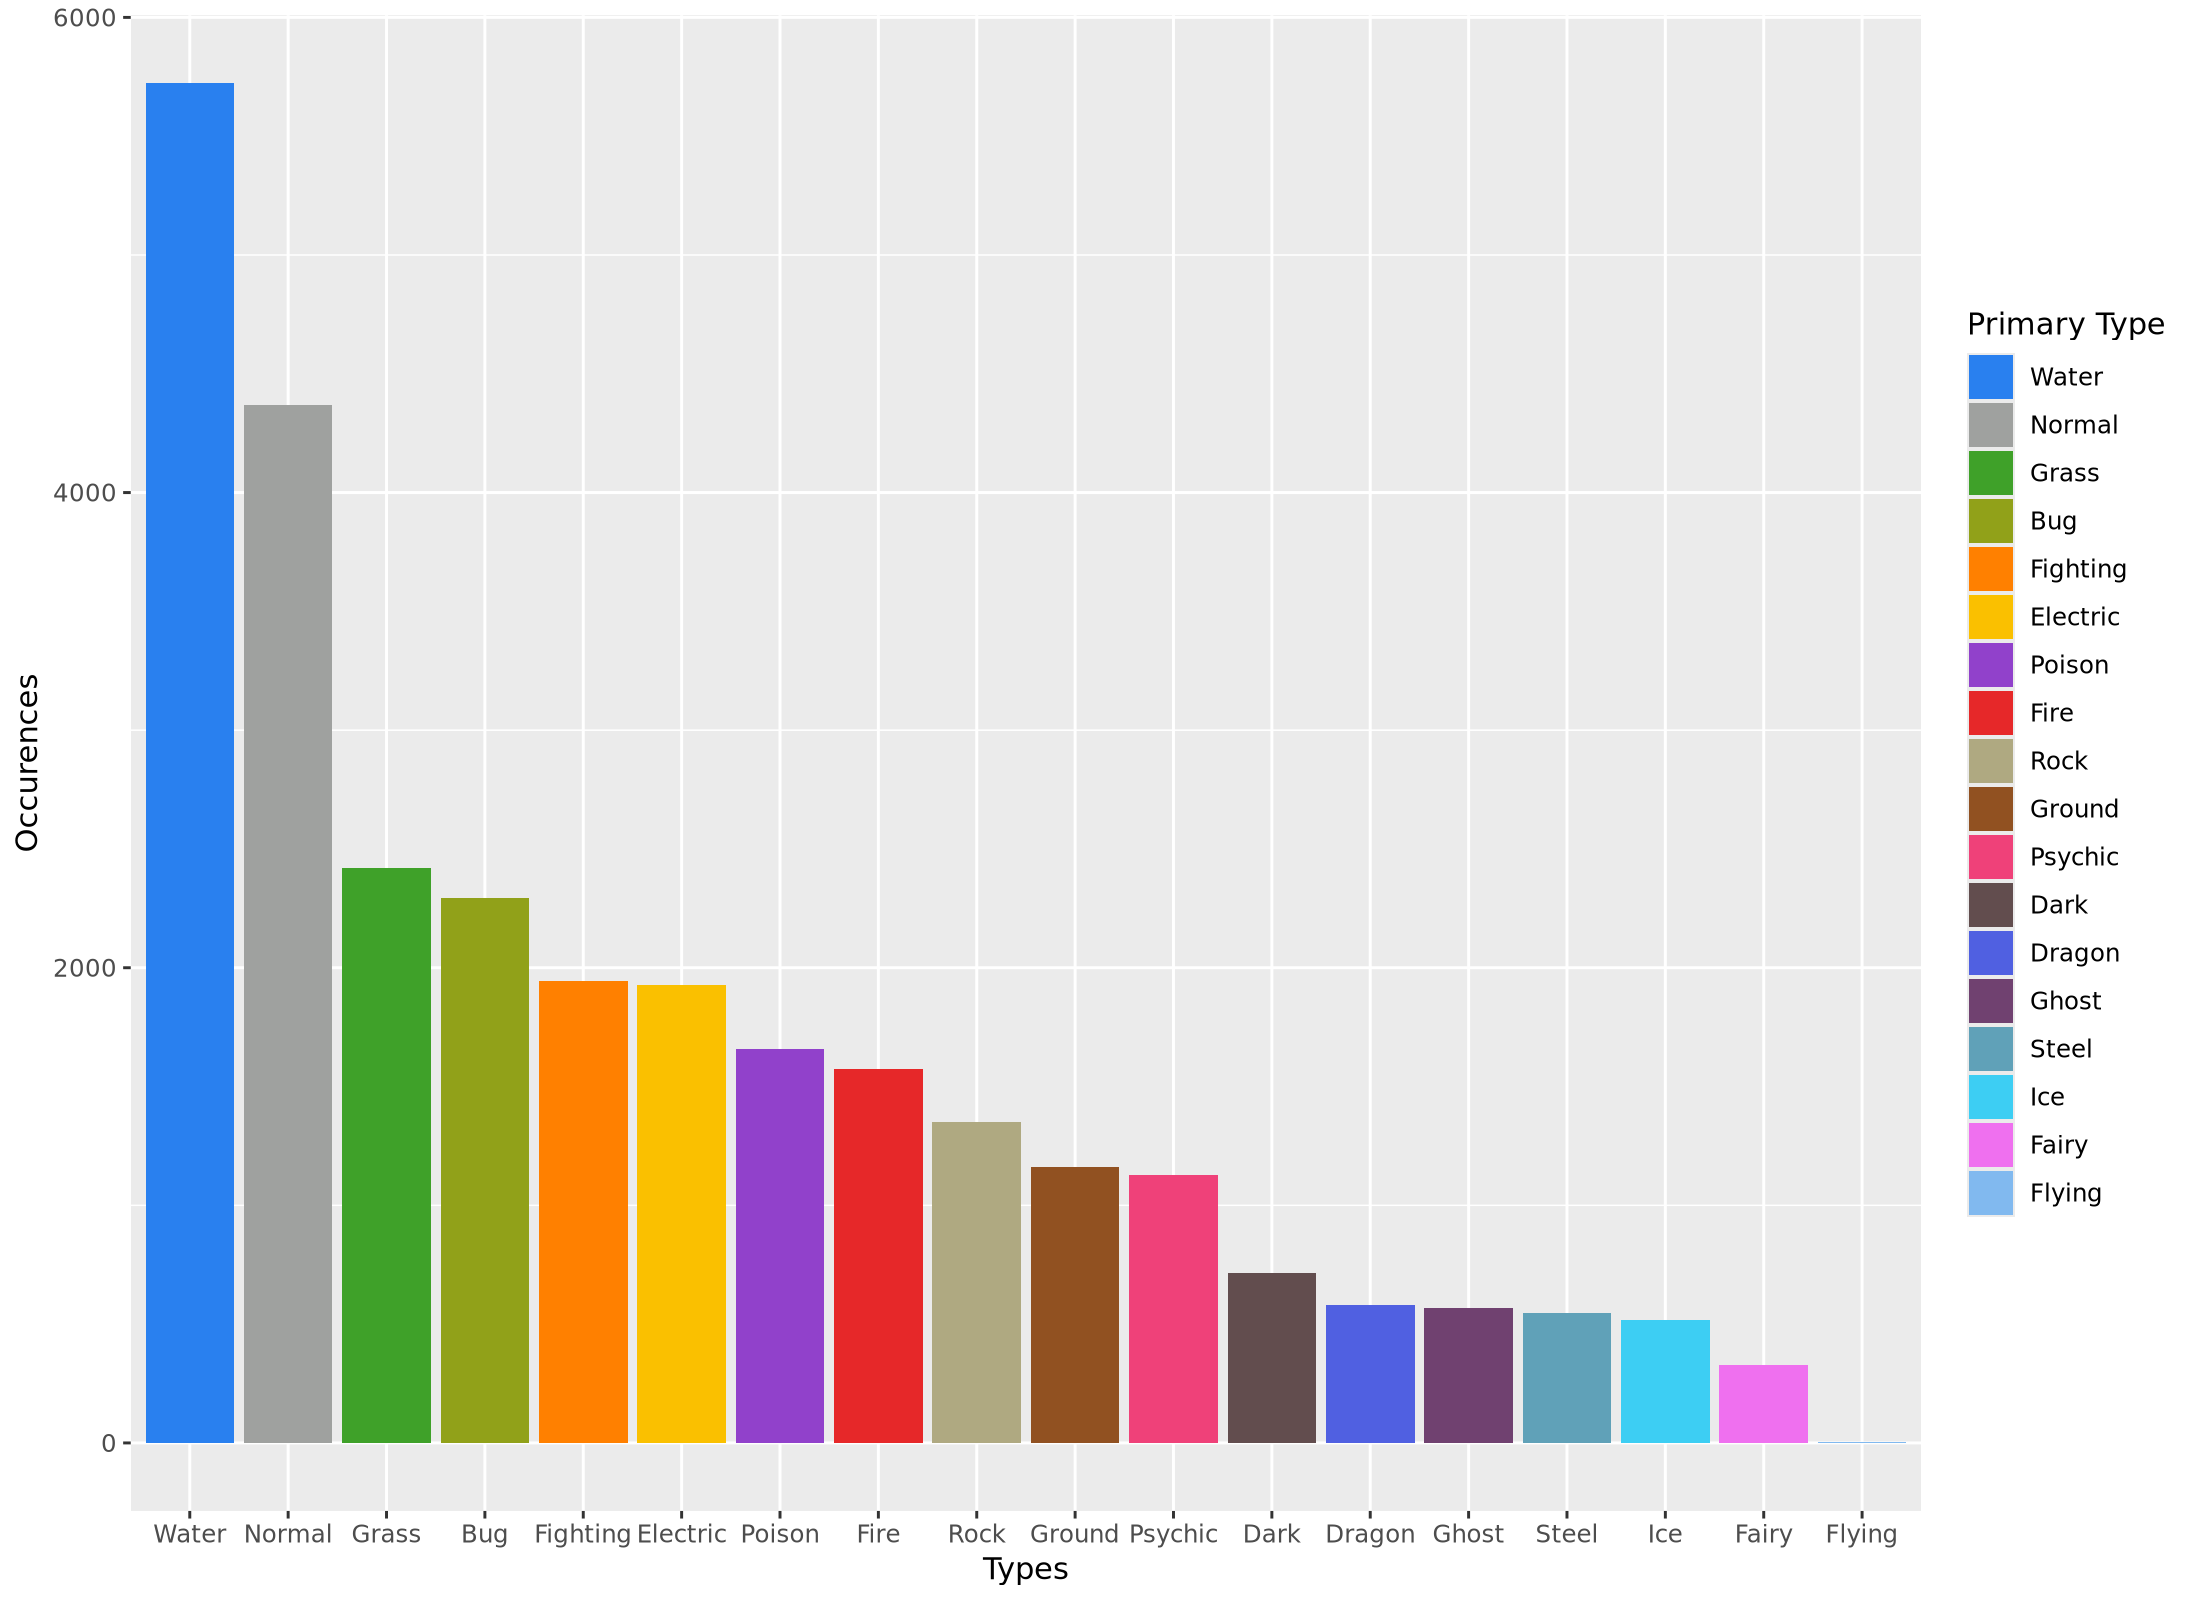

In [9]:
tibbleType1 <- tibble %>%
    group_by(type1) %>%
    summarize(count = n()) %>%
    collect() %>%
    arrange(desc(count)) %>%
    mutate(type1 = factor(type1, levels = type1))

options(repr.plot.width=11, repr.plot.height=8, repr.plot.res=200)

ggplot(tibbleType1, aes(x = type1, y = count, fill=type1)) +
  geom_col() +
    labs(
        x = "Types",
        y = "Occurences",
        fill = "Primary Type"
      ) +
        scale_fill_manual(values = c(
    "Normal" = "#9fa19f",
    "Fire" = "#e62829",
    "Water" = "#2980ef",
    "Grass" = "#3fa129",
    "Fighting" = "#ff8000",
    "Flying" = "#81b9ef",
    "Poison" = "#9141cb",
    "Electric" = "#fac000",
    "Ground" = "#915121",
    "Psychic" = "#ef4179",
    "Rock" = "#afa981",
    "Ice" = "#3dcef3",
    "Bug" = "#91a119",
    "Dragon" = "#5060e1",
    "Dark" = "#624d4e",
    "Steel" = "#60a1b8",
    "Ghost" = "#704170", 
    "Fairy" = "#ef70ef"))

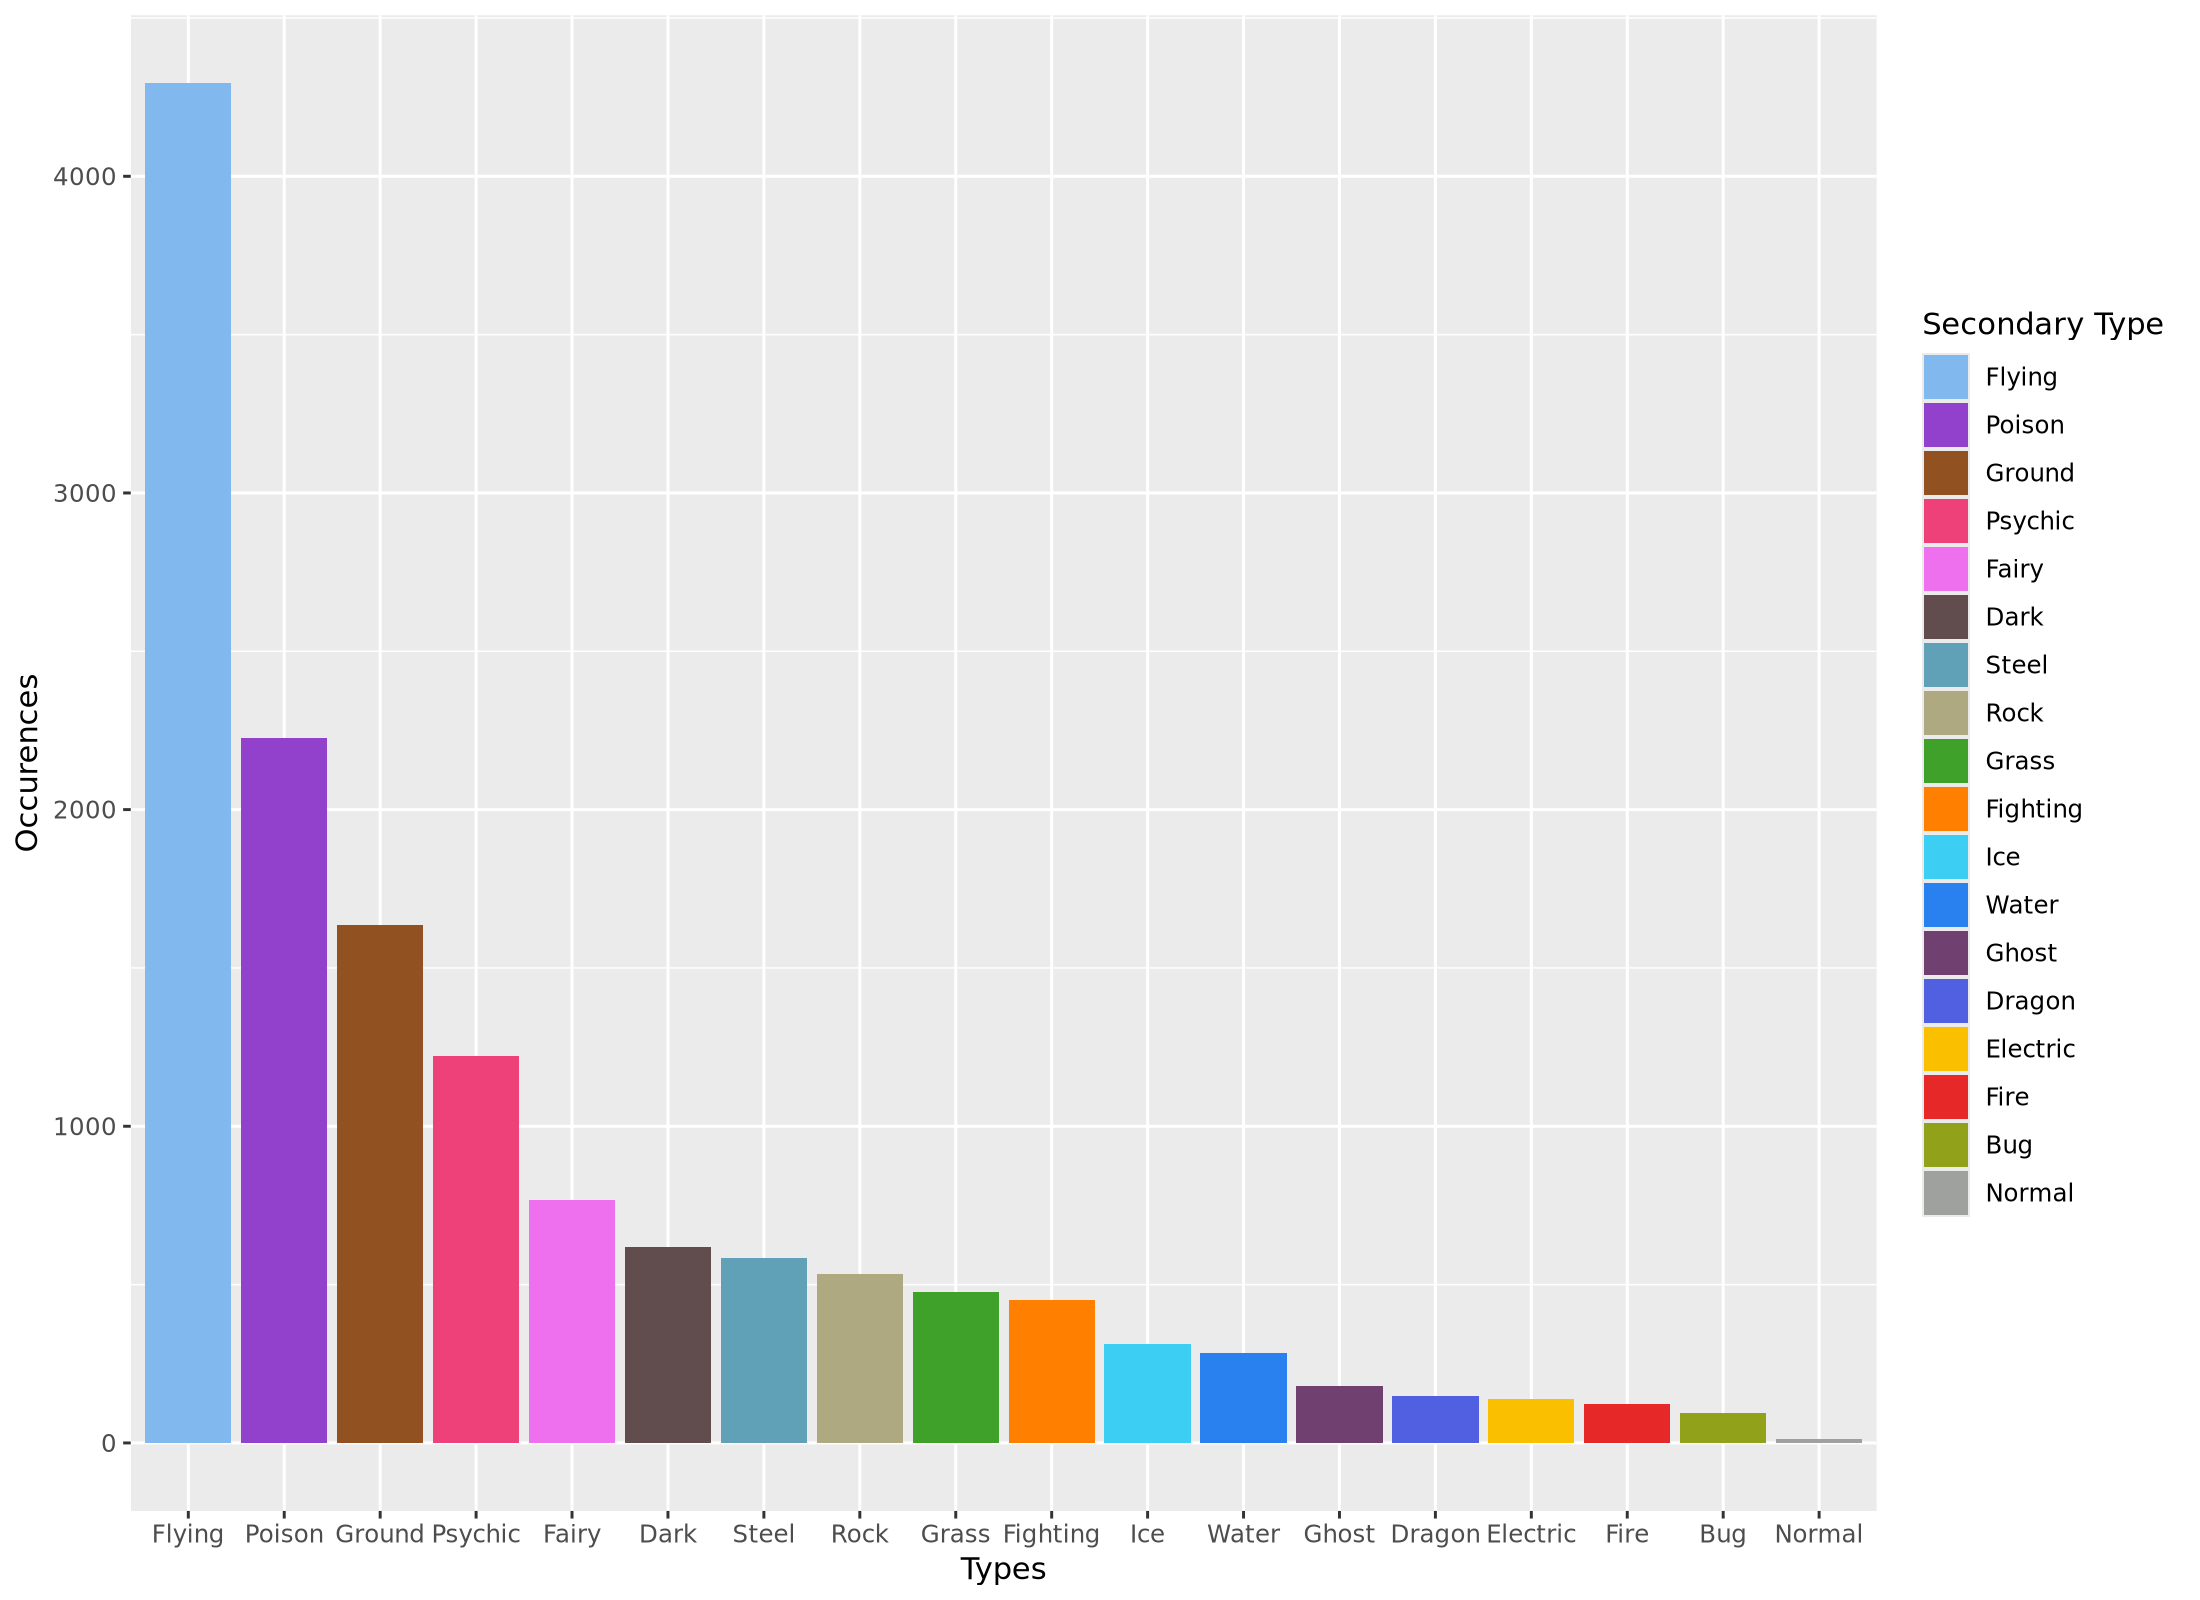

In [6]:
tibbleType2 <- tibble %>%
    group_by(type2) %>%
    filter(type2 != "None") %>%
    summarize(count = n()) %>%
    collect() %>%
    arrange(desc(count)) %>%
    mutate(type2 = factor(type2, levels = type2))


options(repr.plot.width=11, repr.plot.height=8, repr.plot.res=200)

ggplot(tibbleType2, aes(x = type2, y = count, fill=type2)) +
  geom_col() +
    labs(
        x = "Types",
        y = "Occurences",
    fill = "Secondary Type"
    ) +
        scale_fill_manual(values = c(
    "Normal" = "#9fa19f",
    "Fire" = "#e62829",
    "Water" = "#2980ef",
    "Grass" = "#3fa129",
    "Fighting" = "#ff8000",
    "Flying" = "#81b9ef",
    "Poison" = "#9141cb",
    "Electric" = "#fac000",
    "Ground" = "#915121",
    "Psychic" = "#ef4179",
    "Rock" = "#afa981",
    "Ice" = "#3dcef3",
    "Bug" = "#91a119",
    "Dragon" = "#5060e1",
    "Dark" = "#624d4e",
    "Steel" = "#60a1b8",
    "Ghost" = "#704170", 
    "Fairy" = "#ef70ef"))

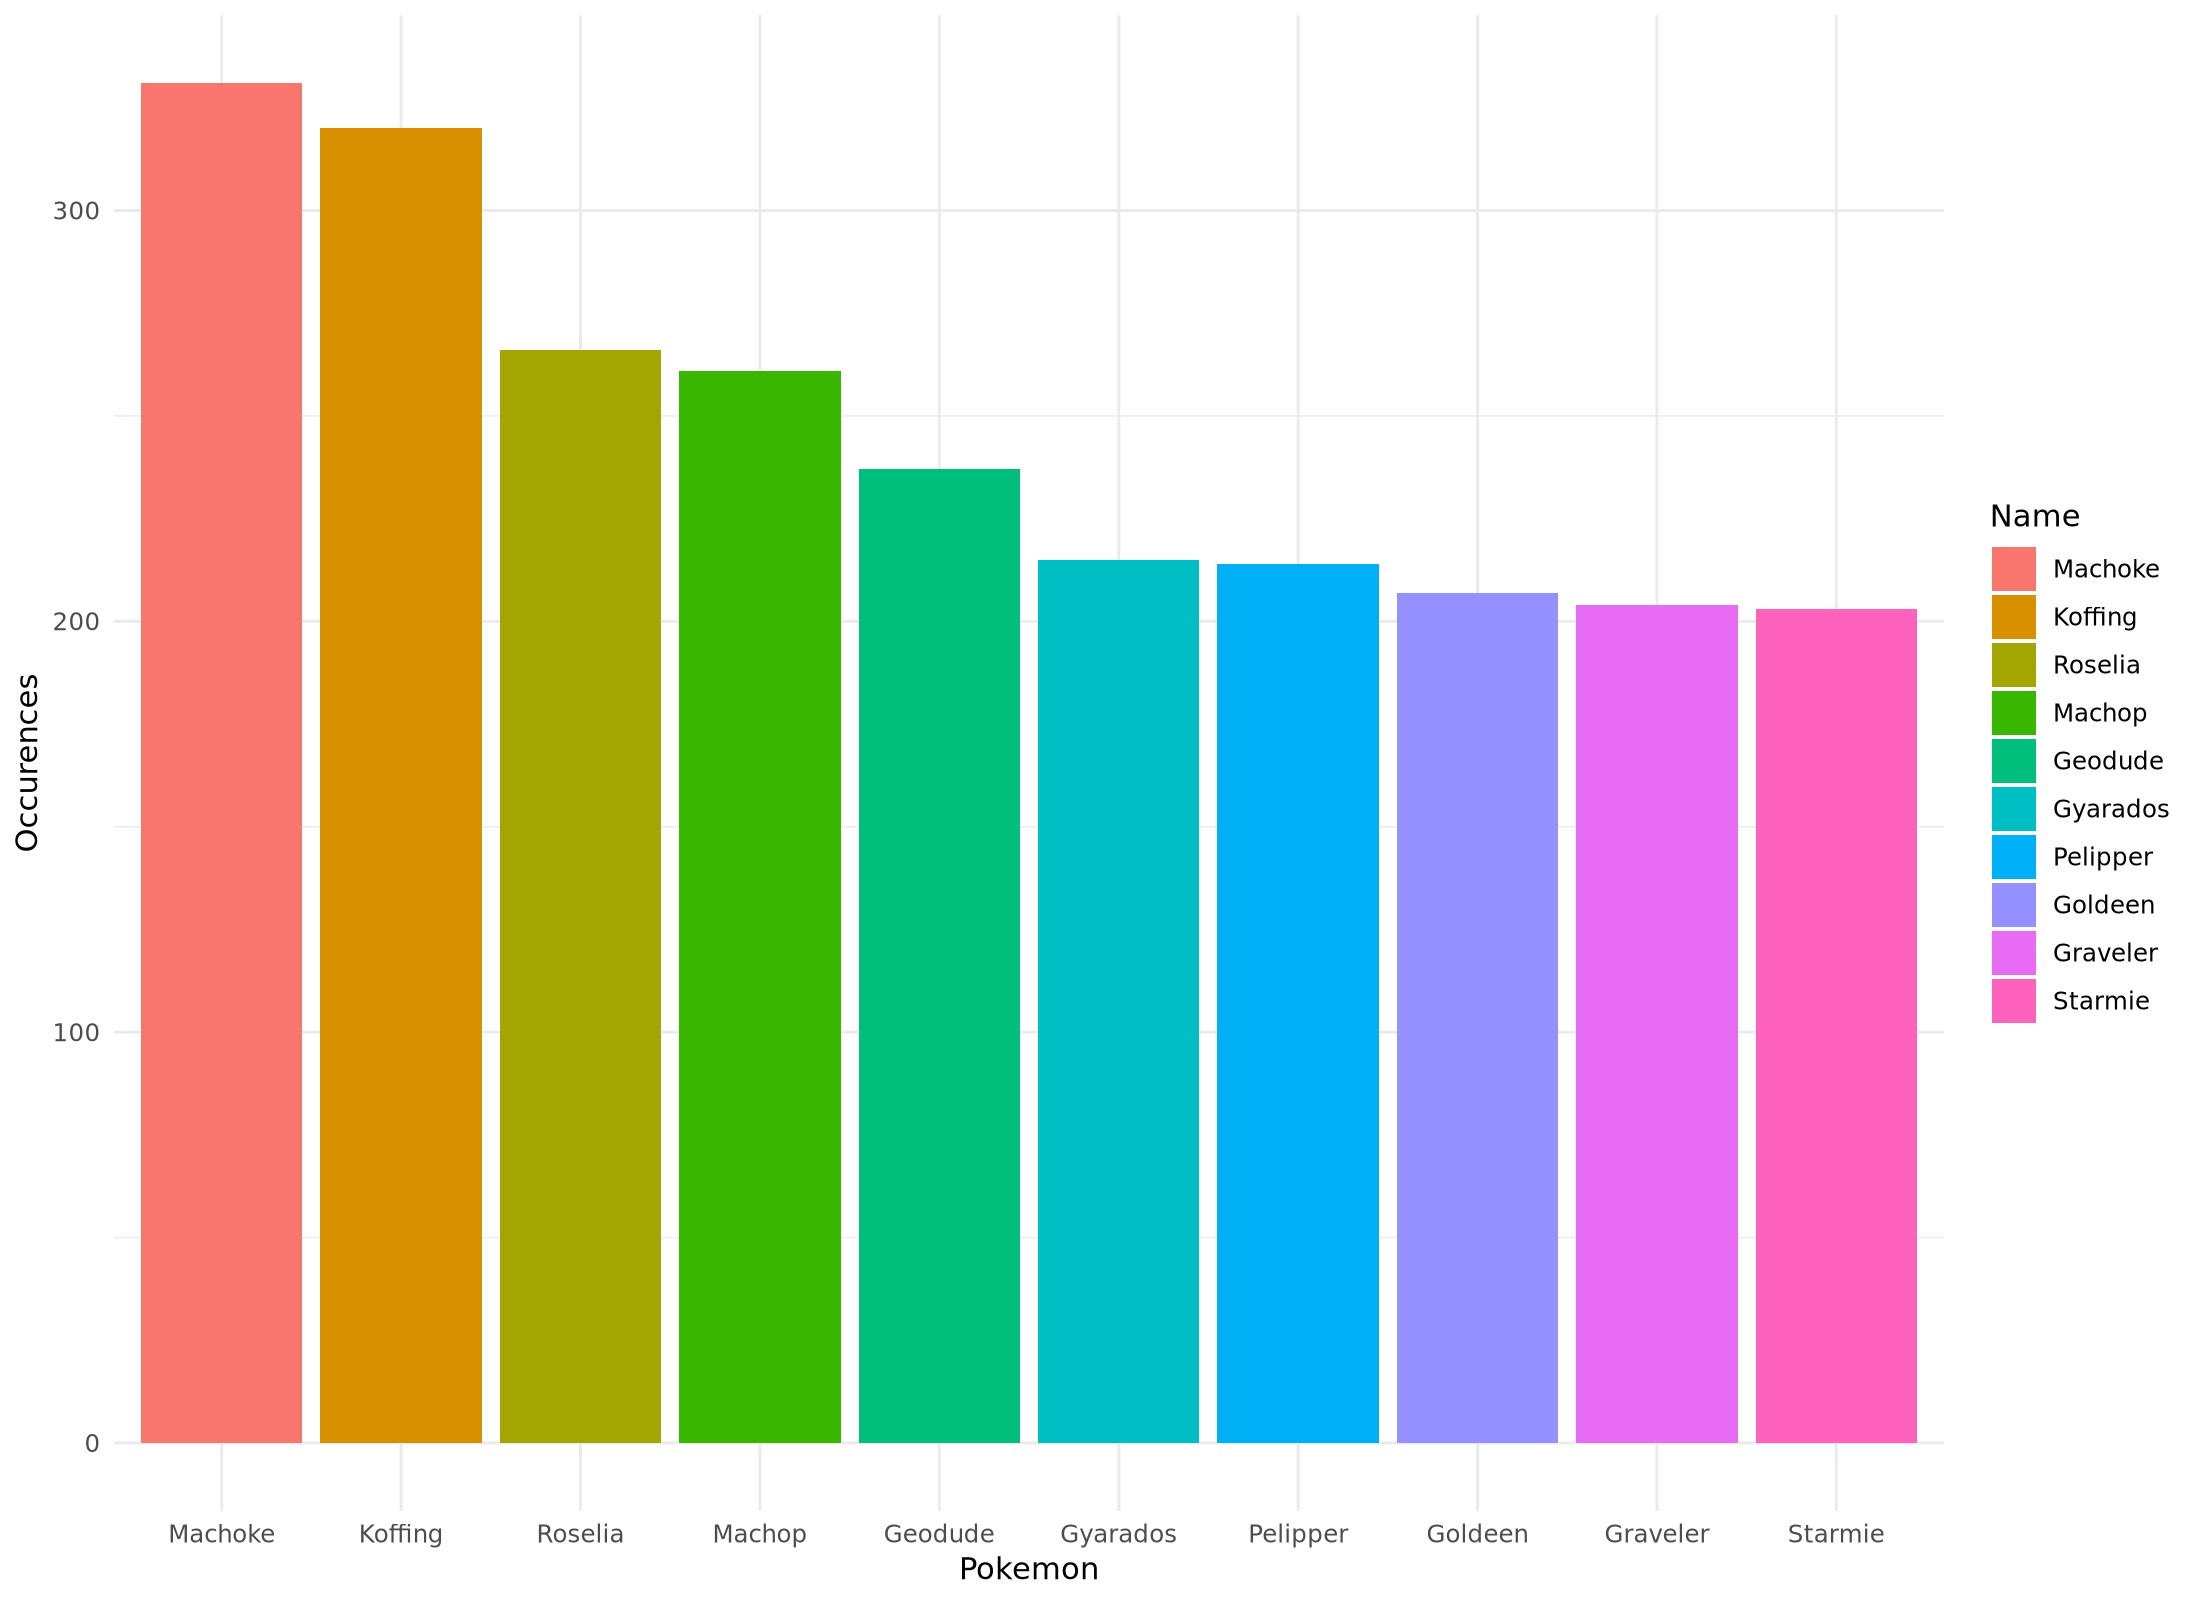

In [7]:
tibbleType3 <- tibble %>%
  group_by(pokename) %>%
  summarize(count = n()) %>%
  collect() %>%
  filter(count > 200) %>%
  arrange(desc(count)) %>%
    mutate(pokename = factor(pokename, levels = pokename))


options(repr.plot.width=11, repr.plot.height=8, repr.plot.res=200)

ggplot(tibbleType3, aes(x = pokename, y = count, fill=pokename)) +
  geom_col() +
    labs(
        x = "Pokemon",
        y = "Occurences",
        fill = "Name"
      ) +
    theme_minimal()

**Commentary:** The code used in this project is from Kaggle- specifically https://www.kaggle.com/datasets/lrcusack/pokemontrainers. I've always enjoyed the Pokemon games and when I found the dataset I knew I wanted to do some analysis on it; I definitely wasn't expecting these results! As a brief explanation- for those unfamiliar with the series- each Pokemon has a certain elemental type based upon its habitat and nature. Most Pokemon have two types, a primary and a secondary, though some only have a primary type. The three graphs I chose to make for this final project were analyzing the primary types of Pokemon up until Pokemon Sun and Moon, the secondary types of these same Pokemon, and finally the top ten most common Pokemon for normal trainers to have.

For the first graph, I was expecting a lot more flying types- you can skip ahead a little and see the sheer number of Pokemon with flying as a secondary type- but bizarrely enough only nine Pokemon have flying as a primary type, and six of those Pokemon come from after the dataset was created. The next smallest type- Fairy- was introduced late in the series, meaning that it has a relatively high count for the smaller number of possible entries. The second graph has a lot more Pokemon with a secondary flying type, which is more in line with what I was expecting, but the number of bug secondary types is bizarre to me; apparently most bug Pokemon have it as their primary type. The third graph also has some unexpected twists; Machoke and Machop appearing so often is very interesting, as is Geodude and Graveler. Each pair shares an evolutionary line, meaning that their lines are much more common than other Pokemon. Roselia and Pelipper are also interesting because they were first introduced in Generation III- nearly six years and four games after the rest of these top ten Pokemon were introduced. That makes their popularity even better, I suppose!

Overall, these graphs were really interesting to analyze! There were a lot of surprising facts inside of them and I definitely wasn't expecting some of these results; something I suppose could be said of any dataset. I'm about out of space, I believe, so thank you for a wonderful semester and for teaching me so much about the basics of data science!